# Image Processing - Assignment 1
### Zerntev Alexandros (not an official member of DSIT master's program yet, so please keep the mark for the next year)

## Introduction
The assignment consists of two parts. Part one is to convert image_1 to image_2 and part two the other way around.

### Image similarity metrics
The metrics that have been used to evaluate image similarity were: 
1) Structural Similarity which is a perception based metric. <a href="https://en.wikipedia.org/wiki/Structural_similarity">Wikipedia article link link</a> <br>
2) Mean square error which is a standard statistical estimator. <a href="https://en.wikipedia.org/wiki/Mean_squared_error">Wikipedia article link link</a>

### The process
At first experiments have been performed based on my personal optical perception combined with the ideas and techniques we were taught during the lectures. Once I determined which transformations fit the most, I created "an optimizer" which consists of 4 nested for loops which find the best parameters that fit image_1 to image_2 applying the determined transformations, the code for that will be provides in file "lab.ipynb". The nested loops is not the most performant way to optimize the parameters, but the range of this parameters is small so there is no need for more advanced techniques like gradient descent etc.

## Part one
After experimentation with almost all transformations that seem to be used to create image_2, the best of them are chosen and placed in a specific order with specific values.
Please note that there is a difference between our perception of images and actual similarity. For example my best score is 87% similarity but to my eyes the 86% is more similar. (Human eyes are not perfect, for example we can not tell the difference between two QR codes)
### Attempt &#x2116; 1
The below code is the first attempt of experimenting with different values and transformations which took his final form after I had done Part two. <br>
The best found result is 86.9% similarity. Each step of below code is well commented.
### The pipeline
First, we apply the laplacian kernel to the image to create that noise <br>
Second, we apply gamma correction with value < 1 to emphasize more black pixels, so gamma correction maps black pixels to a large set and white pixels to a small set. <br>
Third, we revert the image. <br>
Forth, we normalize the picture <br>
Last, we increase some low values

The mean square error is: 128.02730768701068
The structural similarity is: 0.8691463945549803


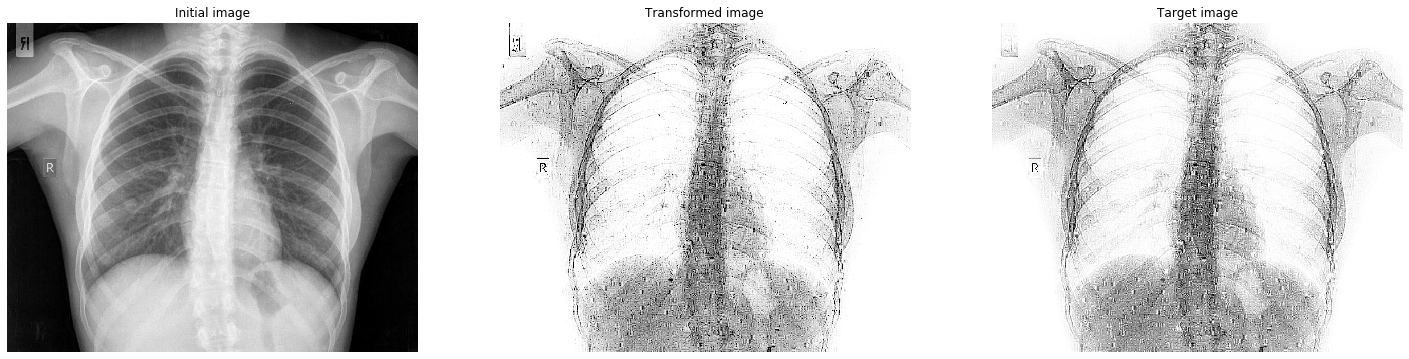

In [69]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met
import copy

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err


# Read the images
img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

res = copy.copy(img1)

# Apply laplacian mask to add the images noise
kernel = -np.ones((3,3),np.float32)
kernel[1,1] = kernel[1,1]*(-9)
res = cv.filter2D(res, -1, kernel, borderType=cv.BORDER_REFLECT)

# Applying gamma correction
gamma = 0.21
res = res.astype('float')/255
res = res**(1.0/gamma)*255

# Inverse colors
res = np.abs(255-res)

res = cv.normalize(res, res, 0, 255, cv.NORM_MINMAX)

# Increase some low values
res[res < 100] += 30

print("The mean square error is: "+str(mse(res,img2)))
print("The structural similarity is: "+str(met.structural_similarity(res.astype('float'),img2.astype('float'))))


fig, axes = plt.subplots(1, 3, figsize=(25,10))


plt.subplot(131), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title("Initial image")
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title("Transformed image")
plt.subplot(133), plt.imshow(img2, cmap='gray'), plt.axis('off'), plt.title("Target image")
plt.show()

### Attempt &#x2116; 2
The below code is the second attempt of experimenting with different values and transformations. <br>
But this time an optimizer was used to find values that fit the most, the code of the optimizer can be found in file: "lab.ipynb". 
The best found result is 87.4% similarity.
Each step of below code is well commented.

### The pipeline
The pipeline here is the same as the previous one, with 2 differences: 1) we use logarithmic function instead of gamma correction 2) We add a linear transformation.

The mean square error is: 120.85515405616225
The structural similarity is: 0.8741907474160613


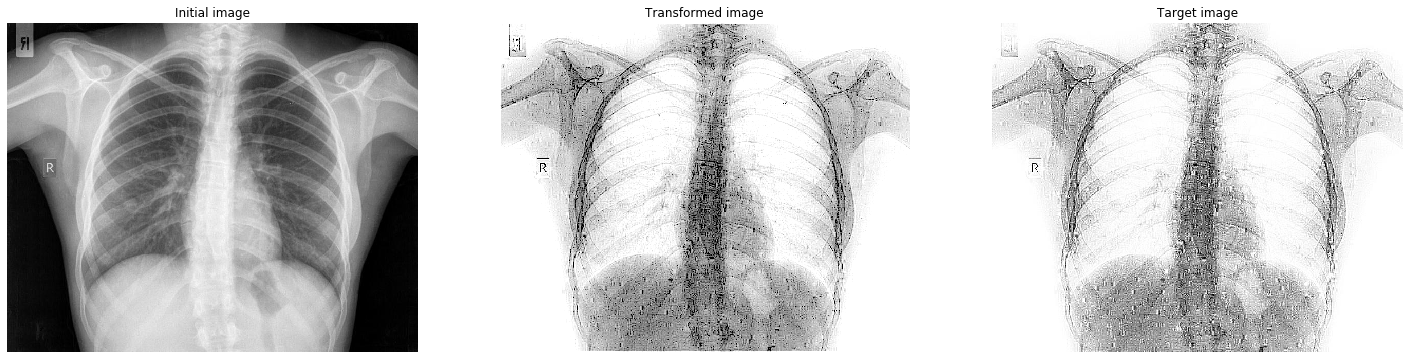

In [26]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

# Read the images
img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

# Inverse colors
res = np.abs(255-img1)

# Apply laplacian mask to add the images noise
kernel = -np.ones((3,3),np.float32)
kernel[1,1] = kernel[1,1]*(-9.5)
res = cv.filter2D(res, -1, kernel, borderType=cv.BORDER_CONSTANT)

# Apply a linear transformation
res = cv.add(res,-30)
res = cv.multiply(res,0.2)

# Apply a logarithmic transformation
res = (np.log(res+1)/(np.log(1+np.max(res))))*255
res = np.array(res,dtype=np.uint8)

# Increace low values
res[res < 70] += 30

print("The mean square error is: "+str(mse(res,img2)))
print("The structural similarity is: "+str(met.structural_similarity(res.astype('float'),img2.astype('float'))))


fig, axes = plt.subplots(1, 3, figsize=(25,10))


plt.subplot(131), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title("Initial image")
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title("Transformed image")
plt.subplot(133), plt.imshow(img2, cmap='gray'), plt.axis('off'), plt.title("Target image")
plt.show()

## Part two
In this part I had to revert image_2 to image_1. The transformation was pretty straight forward and actually helped me redo the first part. The result will be explained below.
### The pipeline
First, we apply the Gaussian filter with 7x7 kernel (that was tested with different sizes, but this one had the best score), to get rid of the noise that was created during the initial transformation (to smooth the image).<br>
Second, we revert the image.<br>
Third, we apply gamma correction emphasize the less white pixels. (Gamma correction here, maps black pixels to a small set and white pixels to large set because gamma > 1 ) <br>
Last, we increasing some low values (this line is commented because the matplotlib representation normalizes the image. If you uncomment it the score will be better but the optical representation will be worse)

The mean square error is: 85.31175430417942
The structural similarity is: 0.811756948187784


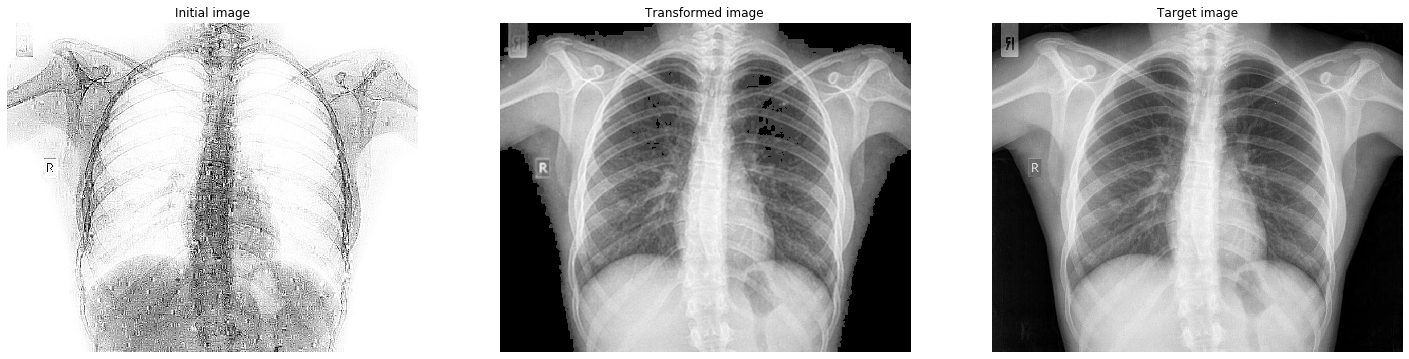

In [101]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met
import copy

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

# Applying gaussian blur to get rid of the noise
res = cv.GaussianBlur(img2,(7,7),0)
res = np.abs(255-res)

# Applying gamma correction to emphasize the less white pixels
gamma = 3.89
res = res.astype('float')/255
res = res**(1.0/gamma)*255

# res[res<20]+=15

print("The mean square error is: "+str(mse(res,img1)))
print("The structural similarity is: "+str(1 + met.structural_similarity(res.astype('float'),img2.astype('float'))))

fig, axes = plt.subplots(1, 3, figsize=(25,10))


plt.subplot(133), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title("Target image")
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title("Transformed image")
plt.subplot(131), plt.imshow(img2, cmap='gray'), plt.axis('off'), plt.title("Initial image") 
plt.show()

## Result comments
We can see that the transformed image is almost identical to the targeted image, the only difference is some "weird" spots around the center and not a smooth transition from background to the actual x-rayed chest.
This is the result of lost information during the initial transformation, specifically during the initial transformation some pixels exceed their max or min value therefore they are becoming the same with the pixels that have
already had the max or min value of an image.
